# Решающие деревья

#  I. Немного решающих деревьев
##### Задача 1. Построение "среднего" алгоритма
В этом задании вам нужно построить графики, демонстрирующие, как алгоритм аппроксимирует истинную зависимость в данных и как он меняется в зависимости от гиперпараметров метода обучения.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x)   # истинная зависимость в данных
sample_size = 100      # длина выборки
samples_num = 20       # количество выборок
linspace = np.linspace(0, 7, 1000)  # точки для построения графиков

__1. (2 балла)__
1. Сгенерируйте выборку $x$ из одномерного экспоненциального распределения (np.random.exponential) длины sample_size.
1. Создайте вектор целевых переменных $y$ как сумму $f(x)$ и случайного шума, сгенерированного из равномерного распределения на отрезке $[-1, 1]$ (np.random.uniform).
1. Обучите DecisionTreeRegressor с параметрами по умолчанию на полученной выборке и сделайте предсказания для объектов из linspace.
1. Постройте два графика на одном рисунке: $f(x)$ и зависимость, восстановленную решающим деревом.

    Рекомендация: не забудьте, что все методы обучения в sklearn требуют на вход двумерную матрицу объекты-признаки. Сделать такую из одномерного вектора можно добавлением мнимых осей (np.newaxis).

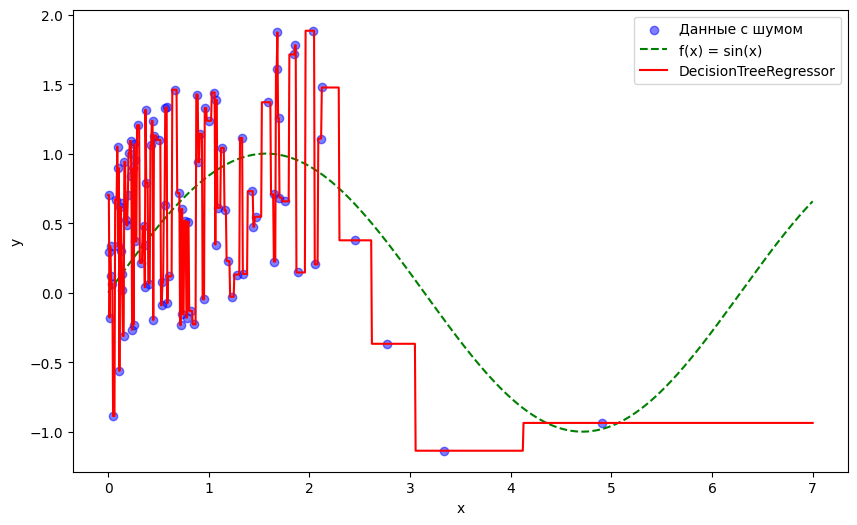

In [3]:
from sklearn.tree import DecisionTreeRegressor

x = np.random.exponential(scale=1, size=sample_size)
noise = np.random.uniform(low=-1, high=1, size=sample_size)
y = np.sin(x) + noise

regressor = DecisionTreeRegressor()
regressor.fit(x[:, np.newaxis], y)

y_pred = regressor.predict(linspace[:, np.newaxis])

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Данные с шумом', color='b', alpha=0.5)
plt.plot(linspace, np.sin(linspace), color='g', linestyle='--', label='f(x) = sin(x)')
plt.plot(linspace, y_pred, label='DecisionTreeRegressor', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__2. (1 балл)__

Повторите первые 3 шага, описанные выше, samples_num раз. На одном графике для каждого обученного решающего дерева визуализируйте восстановленную им зависимость (рекомендуется все такие линии рисовать полупрозрачными и серым цветом: plt.plot(...... color="gray", alpha=0.5)).  На этом же графике изобразите истинную зависимость f(x) (красным цветом: color="red") и усредненную по всем деревьям восстановленную зависимость (черным цветом: color="black").    

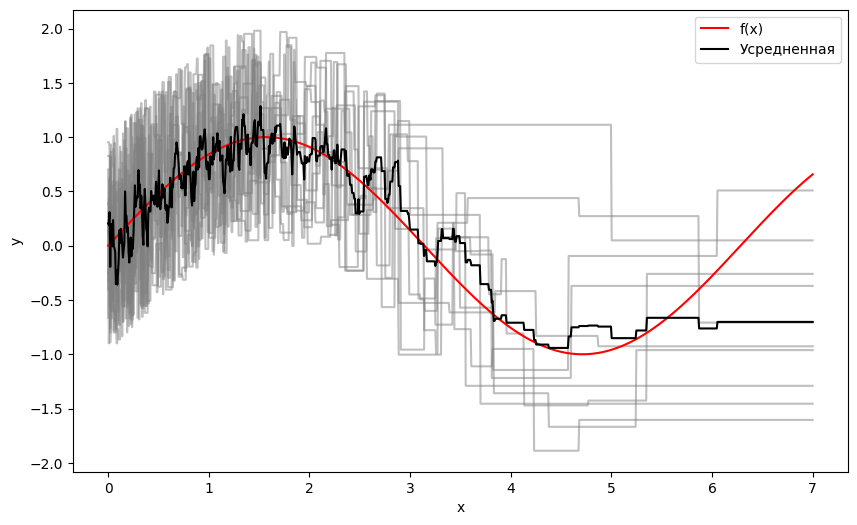

In [4]:
def depth(x, y, depth = 1000):
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(x[:, np.newaxis], y)
    y_pred = regressor.predict(linspace[:, np.newaxis])
    return y_pred

def get():
    x = np.random.exponential(scale=1.0, size=sample_size)
    noise = np.random.uniform(low=-1, high=1, size=sample_size)
    y = np.sin(x) + noise
    return x, y

sample_size = 100
samples_num = 10
y_predictions = np.zeros((samples_num, len(linspace)))

for i in range(samples_num):
    x, y = get()
    y_predictions[i, :] = depth(x, y)

plt.figure(figsize=(10, 6))
for i in range(samples_num):
    plt.plot(linspace, y_predictions[i, :], color="gray", alpha=0.5)

plt.plot(linspace, np.sin(linspace), label='f(x)', color='red')

avg_prediction = np.mean(y_predictions, axis=0)
plt.plot(linspace, avg_prediction, label='Усредненная', color='black')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__3.(0.5 балл):__
Повторите предыдущий пункт, установив максимальную глубину решающего дерева равной 2, а затем равной 4. Таким образом, у вас получится еще два графика.

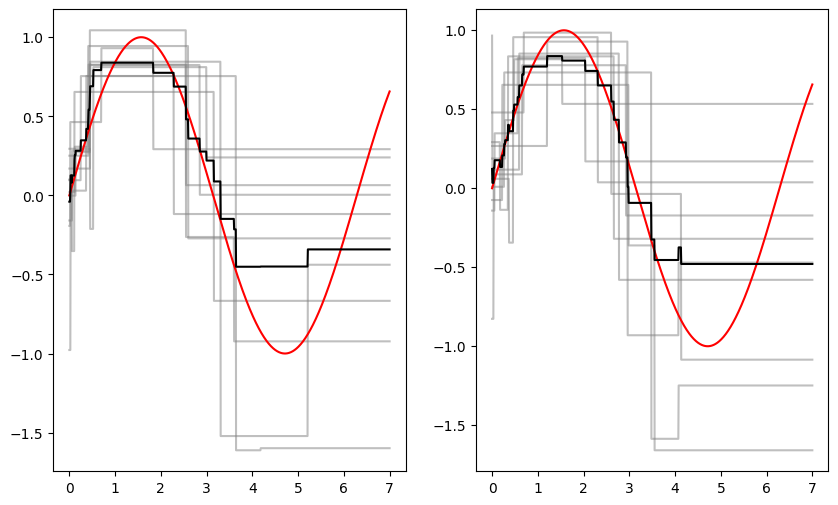

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

x, y = get()
y_predictions = np.zeros((samples_num, len(linspace)))
for i in range(samples_num):
    x, y = get()
    y_predictions[i, :] = depth(x, y, 2)
for i in range(samples_num):
    ax1.plot(linspace, y_predictions[i, :], color="gray", alpha=0.5)
ax1.plot(linspace, np.sin(linspace), label='f(x)', color='red')
avg_prediction = np.mean(y_predictions, axis=0)
ax1.plot(linspace, avg_prediction, label='Усредненная', color='black')

x, y = get()
y_predictions = np.zeros((samples_num, len(linspace)))
for i in range(samples_num):
    x, y = get()
    y_predictions[i, :] = depth(x, y, 2)
for i in range(samples_num):
    ax2.plot(linspace, y_predictions[i, :], color="gray", alpha=0.5)
ax2.plot(linspace, np.sin(linspace), label='f(x)', color='red')
avg_prediction = np.mean(y_predictions, axis=0)
ax2.plot(linspace, avg_prediction, label='Усредненная', color='black')

__4. (0.5 балла)__ Что можно сказать о смещении решающих деревьев, исходя из проведенного эксперимента? В каких из трех рассмотренных случаев (без ограничения на глубину дерева и с ограничением 2 и 4) можно утверждать, что смещение решающего дерева близко к нулю?

**Ответ:**
    
    Без ограничения на глубину дерева: Деревья подстроились под данные, смещение почти равно нулю. Однако, при недостаточно большей глубине, они могут переобучаться и смещение будет низким только на обучающей выборке, но высоким на новых данных.

    С ограничением глубины 2: При ограничении глубины дерева до 2, модель сильно смещена.

    С ограничением глубины 4: При ограничении глубины дерева до 4, модель смещена меньше, но всё еще много.

### II. Решающие деревья чужими руками

#### Задача 3.
В этой части вам нужно посмотреть на класс написанный за вас для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__8. (1 балл)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [6]:
import pandas as pd
data = pd.read_csv('students.csv')
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [7]:
from importlib import reload
from matplotlib import pyplot as plt
import hw3code
reload(hw3code)

<module 'hw3code' from 'c:\\Users\\Пользователь\\MLhw\\MLhomework\\task7\\hw3code.py'>

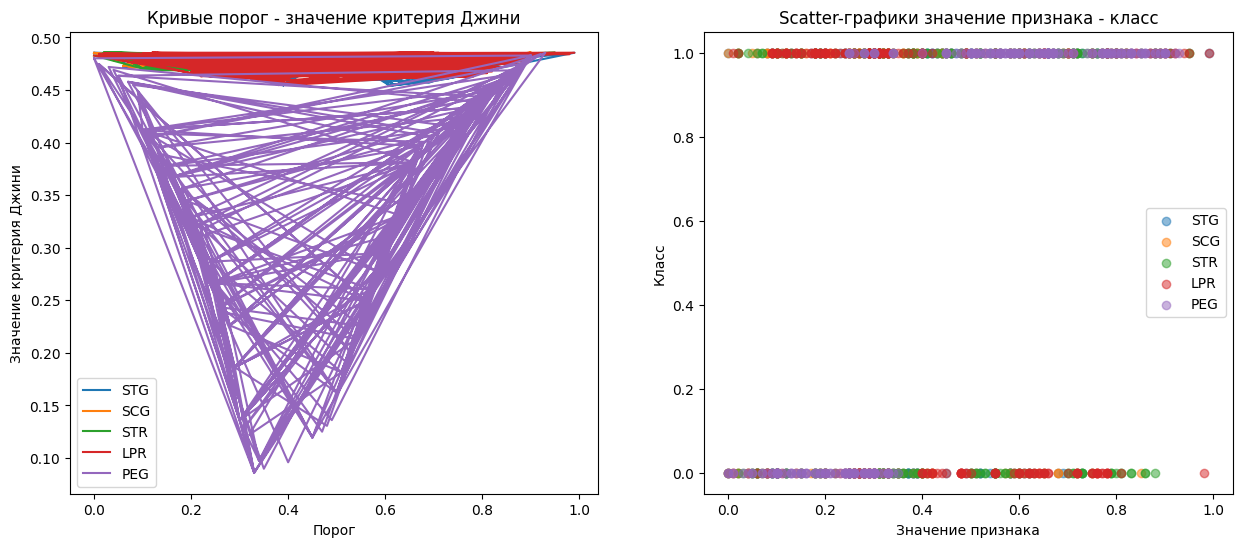

In [8]:
from sklearn.tree import DecisionTreeClassifier

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

feature_names = x.columns
clf = hw3code.DecisionTree(feature_names)

def gini_impurity(groups, classes):
    total_instances = float(sum(len(group) for group in groups))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / total_instances)
    return gini

def plot_gini_curves(x, y, feature_names):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    axes[0].set_title('Кривые порог - значение критерия Джини')
    axes[1].set_title('Scatter-графики значение признака - класс')
    for i, feature_name in enumerate(feature_names):
        thresholds, gini_values = [], []
        for threshold in x[feature_name]:
            left_group = y[x[feature_name] <= threshold]
            right_group = y[x[feature_name] > threshold]
            groups = [left_group.values, right_group.values]
            classes = [0, 1]
            gini = gini_impurity(groups, classes)
            thresholds.append(threshold)
            gini_values.append(gini)
        axes[0].plot(thresholds, gini_values, label=f'{feature_name}')
        axes[1].scatter(x[feature_name], y, alpha=0.5, label=f'{feature_name}')
    axes[0].set_xlabel('Порог')
    axes[0].set_ylabel('Значение критерия Джини')
    axes[0].legend()
    axes[1].set_xlabel('Значение признака')
    axes[1].set_ylabel('Класс')
    axes[1].legend()
    plt.show()

plot_gini_curves(x, y, feature_names)

__9. (1 балл)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

    PEG
    Думаю, признаки для разделения обычно имеют кривые, где значение критерия Джини уменьшается значительно при изменении порога. Такие признаки могут хорошо разделять классы и иметь четкую зависимость между значением признака и классом.
    Кривые для признаков, по которым деление практически невозможно, будут иметь плоский профиль или медленно уменьшаться при изменении порога.
    В scatter-графике тоже видно, что разделять по этому признаку полезно.

__10. (1 балл)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [9]:
import pandas as pd
from sklearn.calibration import LabelEncoder
data = pd.read_csv('msh.csv')
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = data.iloc[:, 1:]
y = data.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.20f}')

Accuracy: 1.00000000000000000000


### IIII. Композиции деревьев
#### Задача 4. Сравнение композиционных методов над решающими деревьями
__11. (1 балл)__

Загрузите датасет из соревнования [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/leaderboard). Возьмите из него первые 10к объектов, оставьте только вещественные признаки, а пропуски замените нулями. Разбейте выборку на обучение и контроль в соотношении 7:3.

1. С помощью cross_val_score с cv=3 оцените качество (accuracy) следующих классификаторов на обучающей выборке:
    * DecisionTreeClassifier
    * BaggingClassifier со 100 деревьями
    * RandomForestClassifier со 100 деревьями
    
Значение получается шумное, но в целом у вас должно получиться, что качество возрастает с каждым следующим алгоритмом (если это не так, то посмотрите как ведут себя алгоритмы с разными сидами в кроссвалидации и самих алгоритмах). Этот пример демонстрирует, что RandomForest — это более сложный алгоритм, чем бэггинг.

In [11]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_csv('train.csv', nrows=10000)

numeric_features = data.select_dtypes(include=[np.number])
numeric_features.fillna(0, inplace=True)

x = numeric_features.drop(columns='target')
y = numeric_features['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

clf_dt = DecisionTreeClassifier()
clf_bagging = BaggingClassifier(n_jobs=-1, estimator=DecisionTreeClassifier(), n_estimators=100)
clf_rf = RandomForestClassifier(n_jobs=-1, n_estimators=100)

cv_score_dt = cross_val_score(clf_dt, x_train, y_train, cv=3, scoring='accuracy')
cv_score_bagging = cross_val_score(clf_bagging, x_train, y_train, cv=3, scoring='accuracy')
cv_score_rf = cross_val_score(clf_rf, x_train, y_train, cv=3, scoring='accuracy')

print(f"Decision Tree Classifier (Accuracy): {cv_score_dt.mean():.10f}")
print(f"Bagging Classifier (Accuracy): {cv_score_bagging.mean():.10f}")
print(f"Random Forest Classifier (Accuracy): {cv_score_rf.mean():.10f}")

Decision Tree Classifier (Accuracy): 0.6674292312
Bagging Classifier (Accuracy): 0.7538562554
Random Forest Classifier (Accuracy): 0.7578565820


#### Задача 5. Число деревьев в случайном лесе
В этой задаче мы рассмотрим, переобучаются ли композиционные алгоритмы с увеличением числа деревьев.

__12. (1 балл)__

Переберите значения от 20 до 1000-5000 деревьев с шагом 20, посчитайте accuracy на тестовой выборке для каждого числа деревьев и постройте график зависимости качества от числа деревьев.

Рекомендация.

Если каждый раз обучать RandomForest с нуля, придётся обучить в общей сумме $20 + 200 + \ldots + 5000$ деревьев.
Однако, как мы знаем, деревья в случайных лесах строятся независимо и параллельно, поэтому можно обучить всего 5000 деревьев.

Для этого в при создании объекта класса RandomForestClassifier нужно указать в том числе warm_start=True. Затем обучить алгоритм с помощью метода fit, использовать метод predict для классификации. После этого с помощью метода set_params изменить параметр n_estimators. Если к полученному объекту применить метод fit, внутри него будет обучаться только недостающее число деревьев.

Переобучается ли случайный лес с увеличением числа деревьев?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


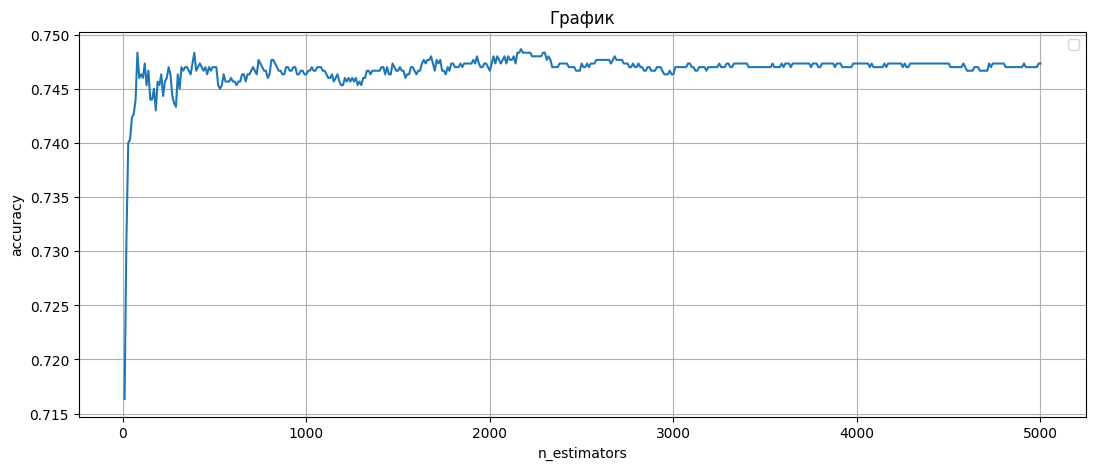

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracys = []
clf_rf = RandomForestClassifier(n_jobs=-1, n_estimators=1, warm_start=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
for n_estimators in range(10, 5000 + 1, 10):
    clf_rf.set_params(n_estimators=n_estimators)
    clf_rf.fit(x_train, y_train)
    y_pred = clf_rf.predict(x_test)
    accuracys.append(accuracy_score(y_test, y_pred))

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot([i for i in range(10, 5000 + 1, 10)], accuracys)
ax.set_title(u"График")
ax.set_xlabel(u"n_estimators")
ax.set_ylabel(u"accuracy")
ax.grid()
ax.legend()

    При увеличении числа деревьев в случайном лесе модель не переобучится, так как больше деревьев способствует усреднению шума в данных и повышению обобщающей способности модели. Однако это не означает, что можно бесконтрольно увеличивать количество деревьев до бесконечности. Существует n_estimators, после которого дополнительные деревья могут не приносить существенного улучшения, и это может увеличить вычислительную сложность модели.